In [17]:
!pip install tensorflow
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import pandas, xgboost, numpy, textblob, string
from tensorflow.keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
import string
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
data = pd.read_csv('/content/sample_data/train.csv',encoding='latin1');
data.head(10)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral,night,70-100,Antigua and Barbuda,97929,440.0,223
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17
7,50e14c0bb8,Soooo high,Soooo high,neutral,noon,21-30,Armenia,2963243,28470.0,104
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive,morning,46-60,Austria,9006398,82400.0,109


In [20]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
None


To get better results, dropping neutral sentiments is a solution

In [21]:
data.drop(data[data["sentiment"]=="neutral"].index,inplace=True)

In [22]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17


# **General Dataset Operations**

In [23]:
data.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [24]:
data.value_counts().sum()

16363

In [25]:
data.duplicated().sum()

0

In [26]:
data.columns= data.columns.str.lower()
data=data.rename(columns={'textid':'text_id','time of tweet':'time_of_tweet','age of user':'age_of_user','population -2020':'population_2020','land area (km²)':'land_area_km2','density (p/km²)':'density_p_km2'})

In [27]:
data.head()

,text_id,text,selected_text,sentiment,time_of_tweet,age_of_user,country,population_2020,land_area_km2,density_p_km2
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive,morning,0-20,Argentina,45195774,2736690.0,17


Text(0, 0.5, 'Frequency of sentiment')

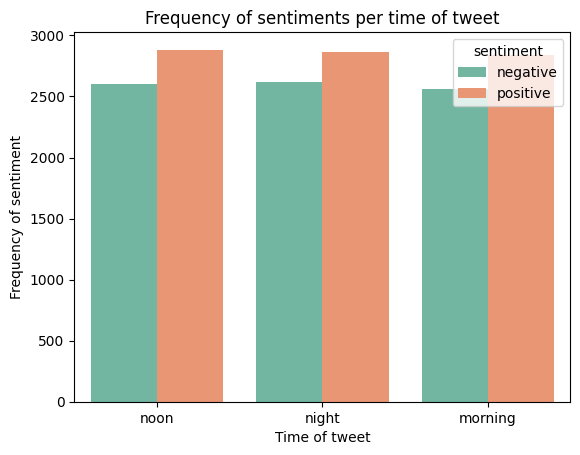

In [28]:
sns.countplot(data=data,x='time_of_tweet',hue='sentiment', palette='Set2')
plt.title("Frequency of sentiments per time of tweet")
plt.xlabel("Time of tweet")
plt.ylabel("Frequency of sentiment")

Text(0, 0.5, 'Frequency of sentiment')

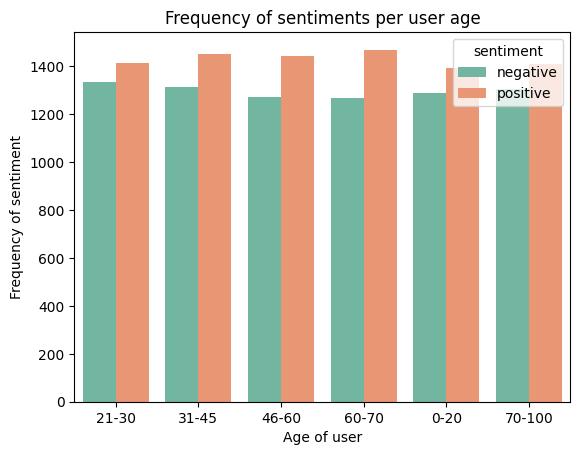

In [29]:
sns.countplot(data=data,x='age_of_user',hue='sentiment', palette='Set2')
plt.title("Frequency of sentiments per user age")
plt.xlabel("Age of user")
plt.ylabel("Frequency of sentiment")

# **New Dataset for Only Text and Sentiment features**

In [30]:
df = pd.DataFrame()
df["text"] = data["text"]
df["label"] = data["sentiment"]

# **Preprocessing**

In [31]:
nltk.download('stopwords')
sw = stopwords.words('english')


df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
df['text'] = df['text'].str.replace('\d', '', regex=True)
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in sw]))
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df.head()

,text,label
1,sooo sad miss san diego,negative
2,bos bullying,negative
3,interview leave alone,negative
4,son couldnt put release already bought,negative
6,feeding baby fun smile coo,positive


In [33]:

def remove_urls(text):
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|www\.[a-zA-Z0-9-]+(?:\.[a-zA-Z0-9-]+)+'
    return re.sub(url_pattern, '', text)


def remove_html_tags(text):
    html_pattern = r'<.*?>'
    return re.sub(html_pattern, '', text)


df['text'] = df['text'].apply(lambda x: remove_urls(x))
df['text'] = df['text'].apply(lambda x: remove_html_tags(x))


# **Word Clouds for Positive and Negative Sentiments**

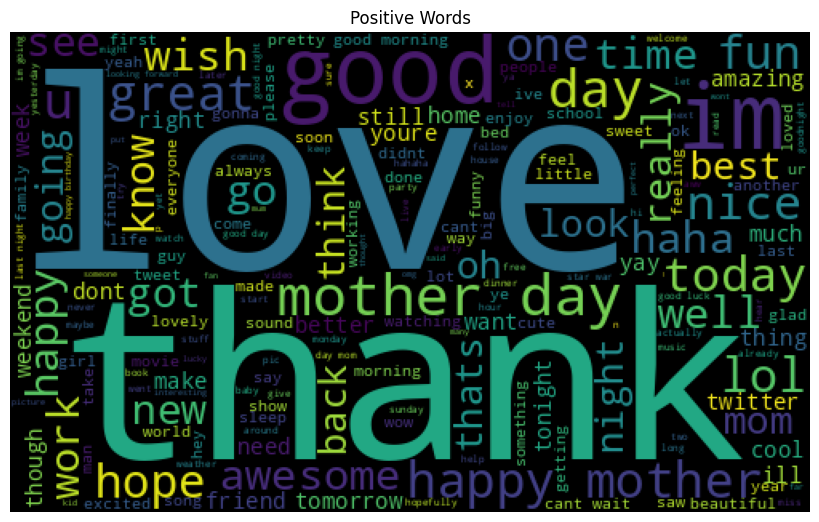

In [34]:
from wordcloud import WordCloud

words_list = df[df['label']=='positive']["text"].unique().tolist()
positive_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300
                ).generate(positive_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Positive Words')
plt.show()

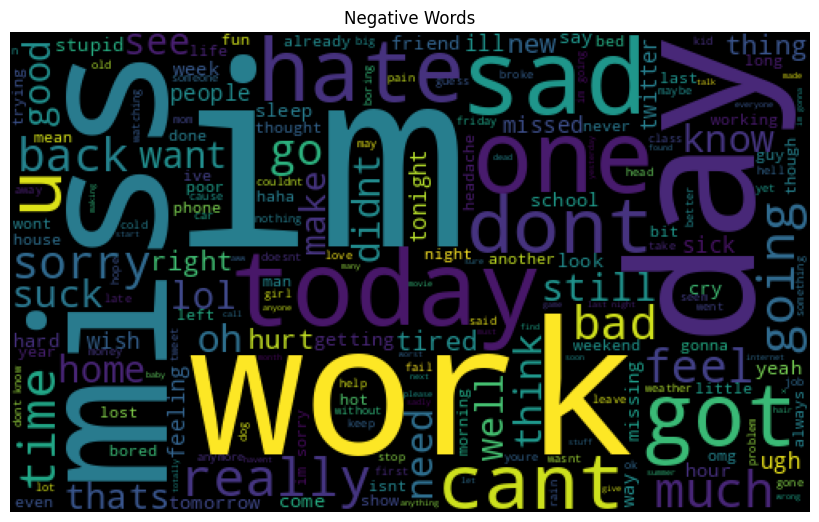

In [35]:
words_list = df[df['label']=='negative']["text"].unique().tolist()
negative_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=500, height = 300
                ).generate(negative_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Negative Words')
plt.show()

# **Train-Test Split**

In [120]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["label"],
                                                                    random_state = 1)

In [121]:
encoder = preprocessing.LabelEncoder()

In [122]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

# **Count Vectorizer**

In [85]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [86]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [41]:
vectorizer.get_feature_names_out()[2:10]

array(['__jasper_hale__', '__sandy', '_a', '_a_bo', '_a_michael',
       '_a_r_a', '_a_tx', '_achillies'], dtype=object)

# **TfidfVectorizer**

In [42]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

TfidfVectorizer()

In [43]:
x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

In [45]:
tf_idf_word_vectorizer.get_feature_names_out()[2:10]

array(['__jasper_hale__', '__sandy', '_a', '_a_bo', '_a_michael',
       '_a_r_a', '_a_tx', '_achillies'], dtype=object)

In [46]:
x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# **N-Gram**




In [47]:
tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range = (2,3))
tf_idf_ngram_vectorizer.fit(train_x)

TfidfVectorizer(ngram_range=(2, 3))

In [48]:
x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(train_x)
x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.transform(test_x)

# **Char-Level**

In [49]:
tf_idf_chars_vectorizer = TfidfVectorizer(analyzer = "char", ngram_range = (2,3))
tf_idf_chars_vectorizer.fit(train_x)

TfidfVectorizer(analyzer='char', ngram_range=(2, 3))

In [50]:
x_train_tf_idf_chars = tf_idf_chars_vectorizer.transform(train_x)
x_test_tf_idf_chars = tf_idf_chars_vectorizer.transform(test_x)

# **Machine Learning Models**

# **Logistic Regression**

In [65]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)

y_pred = log_model.predict(x_test_count)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))


Count Vectors Accuracy: 0.872
Count Vectors Precision (Macro): 0.871
Count Vectors Recall (Macro): 0.872
Count Vectors F1-Score (Macro): 0.871
Count Vectors Precision (Micro): 0.872
Count Vectors Recall (Micro): 0.872
Count Vectors F1-Score (Micro): 0.872


In [66]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
y_pred = log_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_macro = f1_score(test_y, y_pred, average='macro')
f1_micro = f1_score(test_y, y_pred, average='micro')

# Sonuçları ekrana yazdırma
print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


Word-Level TF-IDF Accuracy: 0.870
Word-Level TF-IDF Precision (Macro): 0.870
Word-Level TF-IDF Recall (Macro): 0.871
Word-Level TF-IDF F1-Score (Macro): 0.870
Word-Level TF-IDF Precision (Micro): 0.870
Word-Level TF-IDF Recall (Micro): 0.870
Word-Level TF-IDF F1-Score (Micro): 0.870


In [68]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_ngram, train_y)

y_pred = log_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


N-GRAM TF-IDF Accuracy: 0.689
N-GRAM TF-IDF Precision (Macro): 0.709
N-GRAM TF-IDF Recall (Macro): 0.678
N-GRAM TF-IDF F1-Score (Macro): 0.672
N-GRAM TF-IDF Precision (Micro): 0.689
N-GRAM TF-IDF Recall (Micro): 0.689
N-GRAM TF-IDF F1-Score (Micro): 0.689


In [67]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_chars, train_y)


y_pred = log_model.predict(x_test_tf_idf_chars)


accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')


print("Char-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Char-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Char-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Char-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Char-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Char-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Char-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


Char-Level TF-IDF Accuracy: 0.855
Char-Level TF-IDF Precision (Macro): 0.855
Char-Level TF-IDF Recall (Macro): 0.855
Char-Level TF-IDF F1-Score (Macro): 0.855
Char-Level TF-IDF Precision (Micro): 0.855
Char-Level TF-IDF Recall (Micro): 0.855
Char-Level TF-IDF F1-Score (Micro): 0.855


# **Naive-Bayes**

In [69]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count, train_y)

y_pred = nb_model.predict(x_test_count)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors F1-Score (Micro): {:.3f}".format(f1_micro))


Count Vectors Accuracy: 0.861
Count Vectors Precision (Macro): 0.861
Count Vectors Recall (Macro): 0.860
Count Vectors F1-Score (Macro): 0.860
Count Vectors Precision (Micro): 0.861
Count Vectors Recall (Micro): 0.861
Count Vectors F1-Score (Micro): 0.861


In [70]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_word, train_y)

y_pred = nb_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))



Word-Level TF-IDF Accuracy: 0.855
Word-Level TF-IDF Precision (Macro): 0.856
Word-Level TF-IDF Recall (Macro): 0.853
Word-Level TF-IDF F1-Score (Macro): 0.854
Word-Level TF-IDF Precision (Micro): 0.855
Word-Level TF-IDF Recall (Micro): 0.855
Word-Level TF-IDF F1-Score (Micro): 0.855


In [71]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_ngram, train_y)

y_pred = nb_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


N-GRAM TF-IDF Accuracy: 0.694
N-GRAM TF-IDF Precision (Macro): 0.722
N-GRAM TF-IDF Recall (Macro): 0.682
N-GRAM TF-IDF F1-Score (Macro): 0.675
N-GRAM TF-IDF Precision (Micro): 0.694
N-GRAM TF-IDF Recall (Micro): 0.694
N-GRAM TF-IDF F1-Score (Micro): 0.694


In [72]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_tf_idf_chars, train_y)

y_pred = nb_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF Accuracy: 0.829
CHARLEVEL TF-IDF Precision (Macro): 0.829
CHARLEVEL TF-IDF Recall (Macro): 0.829
CHARLEVEL TF-IDF F1-Score (Macro): 0.829
CHARLEVEL TF-IDF Precision (Micro): 0.829
CHARLEVEL TF-IDF Recall (Micro): 0.829
CHARLEVEL TF-IDF F1-Score (Micro): 0.829


# **Random Forest**

In [73]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_count, train_y)

y_pred = rf_model.predict(x_test_count)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors Random Forest Accuracy: {:.3f}".format(accuracy))
print("Count Vectors Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))


Count Vectors Random Forest Accuracy: 0.859
Count Vectors Random Forest Precision (Macro): 0.859
Count Vectors Random Forest Recall (Macro): 0.860
Count Vectors Random Forest F1-Score (Macro): 0.859
Count Vectors Random Forest Precision (Micro): 0.859
Count Vectors Random Forest Recall (Micro): 0.859
Count Vectors Random Forest F1-Score (Micro): 0.859


In [74]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_word, train_y)

y_pred = rf_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))


Word-Level TF-IDF Random Forest Accuracy: 0.856
Word-Level TF-IDF Random Forest Precision (Macro): 0.856
Word-Level TF-IDF Random Forest Recall (Macro): 0.857
Word-Level TF-IDF Random Forest F1-Score (Macro): 0.856
Word-Level TF-IDF Random Forest Precision (Micro): 0.856
Word-Level TF-IDF Random Forest Recall (Micro): 0.856
Word-Level TF-IDF Random Forest F1-Score (Micro): 0.856


In [75]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_ngram, train_y)

y_pred = rf_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))


N-GRAM TF-IDF Random Forest Accuracy: 0.681
N-GRAM TF-IDF Random Forest Precision (Macro): 0.723
N-GRAM TF-IDF Random Forest Recall (Macro): 0.692
N-GRAM TF-IDF Random Forest F1-Score (Macro): 0.672
N-GRAM TF-IDF Random Forest Precision (Micro): 0.681
N-GRAM TF-IDF Random Forest Recall (Micro): 0.681
N-GRAM TF-IDF Random Forest F1-Score (Micro): 0.681


In [76]:
rf = ensemble.RandomForestClassifier()
rf_model = rf.fit(x_train_tf_idf_chars, train_y)

y_pred = rf_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF Random Forest Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF Random Forest Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF Random Forest Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF Random Forest F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF Random Forest Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF Random Forest Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF Random Forest F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF Random Forest Accuracy: 0.835
CHARLEVEL TF-IDF Random Forest Precision (Macro): 0.835
CHARLEVEL TF-IDF Random Forest Recall (Macro): 0.836
CHARLEVEL TF-IDF Random Forest F1-Score (Macro): 0.834
CHARLEVEL TF-IDF Random Forest Precision (Micro): 0.835
CHARLEVEL TF-IDF Random Forest Recall (Micro): 0.835
CHARLEVEL TF-IDF Random Forest F1-Score (Micro): 0.835


# **XGBoost**

In [77]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_count, train_y)

y_pred = xgb_model.predict(x_test_count)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Count Vectors XGBoost Accuracy: {:.3f}".format(accuracy))
print("Count Vectors XGBoost Precision (Macro): {:.3f}".format(precision_macro))
print("Count Vectors XGBoost Recall (Macro): {:.3f}".format(recall_macro))
print("Count Vectors XGBoost F1-Score (Macro): {:.3f}".format(f1_macro))
print("Count Vectors XGBoost Precision (Micro): {:.3f}".format(precision_micro))
print("Count Vectors XGBoost Recall (Micro): {:.3f}".format(recall_micro))
print("Count Vectors XGBoost F1-Score (Micro): {:.3f}".format(f1_micro))


Count Vectors XGBoost Accuracy: 0.853
Count Vectors XGBoost Precision (Macro): 0.857
Count Vectors XGBoost Recall (Macro): 0.856
Count Vectors XGBoost F1-Score (Macro): 0.853
Count Vectors XGBoost Precision (Micro): 0.853
Count Vectors XGBoost Recall (Micro): 0.853
Count Vectors XGBoost F1-Score (Micro): 0.853


In [78]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word, train_y)

y_pred = xgb_model.predict(x_test_tf_idf_word)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("Word-Level TF-IDF XGBoost Accuracy: {:.3f}".format(accuracy))
print("Word-Level TF-IDF XGBoost Precision (Macro): {:.3f}".format(precision_macro))
print("Word-Level TF-IDF XGBoost Recall (Macro): {:.3f}".format(recall_macro))
print("Word-Level TF-IDF XGBoost F1-Score (Macro): {:.3f}".format(f1_macro))
print("Word-Level TF-IDF XGBoost Precision (Micro): {:.3f}".format(precision_micro))
print("Word-Level TF-IDF XGBoost Recall (Micro): {:.3f}".format(recall_micro))
print("Word-Level TF-IDF XGBoost F1-Score (Micro): {:.3f}".format(f1_micro))


Word-Level TF-IDF XGBoost Accuracy: 0.850
Word-Level TF-IDF XGBoost Precision (Macro): 0.854
Word-Level TF-IDF XGBoost Recall (Macro): 0.853
Word-Level TF-IDF XGBoost F1-Score (Macro): 0.850
Word-Level TF-IDF XGBoost Precision (Micro): 0.850
Word-Level TF-IDF XGBoost Recall (Micro): 0.850
Word-Level TF-IDF XGBoost F1-Score (Micro): 0.850


In [79]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_ngram, train_y)

y_pred = xgb_model.predict(x_test_tf_idf_ngram)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("N-GRAM TF-IDF XGBoost Accuracy: {:.3f}".format(accuracy))
print("N-GRAM TF-IDF XGBoost Precision (Macro): {:.3f}".format(precision_macro))
print("N-GRAM TF-IDF XGBoost Recall (Macro): {:.3f}".format(recall_macro))
print("N-GRAM TF-IDF XGBoost F1-Score (Macro): {:.3f}".format(f1_macro))
print("N-GRAM TF-IDF XGBoost Precision (Micro): {:.3f}".format(precision_micro))
print("N-GRAM TF-IDF XGBoost Recall (Micro): {:.3f}".format(recall_micro))
print("N-GRAM TF-IDF XGBoost F1-Score (Micro): {:.3f}".format(f1_micro))


N-GRAM TF-IDF XGBoost Accuracy: 0.592
N-GRAM TF-IDF XGBoost Precision (Macro): 0.727
N-GRAM TF-IDF XGBoost Recall (Macro): 0.613
N-GRAM TF-IDF XGBoost F1-Score (Macro): 0.544
N-GRAM TF-IDF XGBoost Precision (Micro): 0.592
N-GRAM TF-IDF XGBoost Recall (Micro): 0.592
N-GRAM TF-IDF XGBoost F1-Score (Micro): 0.592


In [80]:
xgb = xgboost.XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_chars, train_y)

y_pred = xgb_model.predict(x_test_tf_idf_chars)

accuracy = accuracy_score(test_y, y_pred)
precision_macro = precision_score(test_y, y_pred, average='macro')
recall_macro = recall_score(test_y, y_pred, average='macro')
f1_macro = f1_score(test_y, y_pred, average='macro')

precision_micro = precision_score(test_y, y_pred, average='micro')
recall_micro = recall_score(test_y, y_pred, average='micro')
f1_micro = f1_score(test_y, y_pred, average='micro')

print("CHARLEVEL TF-IDF XGBoost Accuracy: {:.3f}".format(accuracy))
print("CHARLEVEL TF-IDF XGBoost Precision (Macro): {:.3f}".format(precision_macro))
print("CHARLEVEL TF-IDF XGBoost Recall (Macro): {:.3f}".format(recall_macro))
print("CHARLEVEL TF-IDF XGBoost F1-Score (Macro): {:.3f}".format(f1_macro))
print("CHARLEVEL TF-IDF XGBoost Precision (Micro): {:.3f}".format(precision_micro))
print("CHARLEVEL TF-IDF XGBoost Recall (Micro): {:.3f}".format(recall_micro))
print("CHARLEVEL TF-IDF XGBoost F1-Score (Micro): {:.3f}".format(f1_micro))


CHARLEVEL TF-IDF XGBoost Accuracy: 0.857
CHARLEVEL TF-IDF XGBoost Precision (Macro): 0.857
CHARLEVEL TF-IDF XGBoost Recall (Macro): 0.858
CHARLEVEL TF-IDF XGBoost F1-Score (Macro): 0.857
CHARLEVEL TF-IDF XGBoost Precision (Micro): 0.857
CHARLEVEL TF-IDF XGBoost Recall (Micro): 0.857
CHARLEVEL TF-IDF XGBoost F1-Score (Micro): 0.857


# **Best Model Prediction Test**

In [139]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)

In [143]:
new_comment1 = pd.Series("no not good look at that shit very bad")

In [146]:
v = CountVectorizer()
v.fit(train_x)
new_comment1 = v.transform(new_comment1)

In [147]:
log_model.predict(new_comment1)

array([0])

In [148]:
new_comment2 = pd.Series("this film is very nice and good i like it")

In [149]:
v= CountVectorizer()
v.fit(train_x)
new_comment2 = v.transform(new_comment2)

In [150]:
log_model.predict(new_comment2)

array([1])

Model predicted all the new comments correctly